In [40]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from mapper_functions import plot_global
from mapper_functions import plot_na

In [41]:
from my_functions import read_obsfcstana

path = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data'
file_name_start = 'OLv7_M36.ens_avg.ldas_ObsFcstAna.201907'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)

Total number of obs =  98115


In [42]:
# No-data check
#  - single ensemble member integrations yield obs_obsvar==nodata)  
#  - in some cases obs_fcst (a.k.a. Obs_pred) is no-data-value, 
#     eg. SMOS Tb when snow is present)

nodata = -9999

obs_obsvar[obs_obsvar == nodata] = np.nan
obs_fcst[obs_fcst == nodata] = np.nan
obs_fcstvar[obs_fcstvar == nodata] = np.nan
obs_ana[obs_ana == nodata] = np.nan
obs_anavar[obs_anavar == nodata] = np.nan

In [43]:
# Make obarray
    
numobs = len(obs_obs)
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon
obarray[:, 2] = obs_lat
obarray[:, 0] = obs_obsvar

# obarray[(obarray[ :, 0] > 1e16) , 0] = np.nan

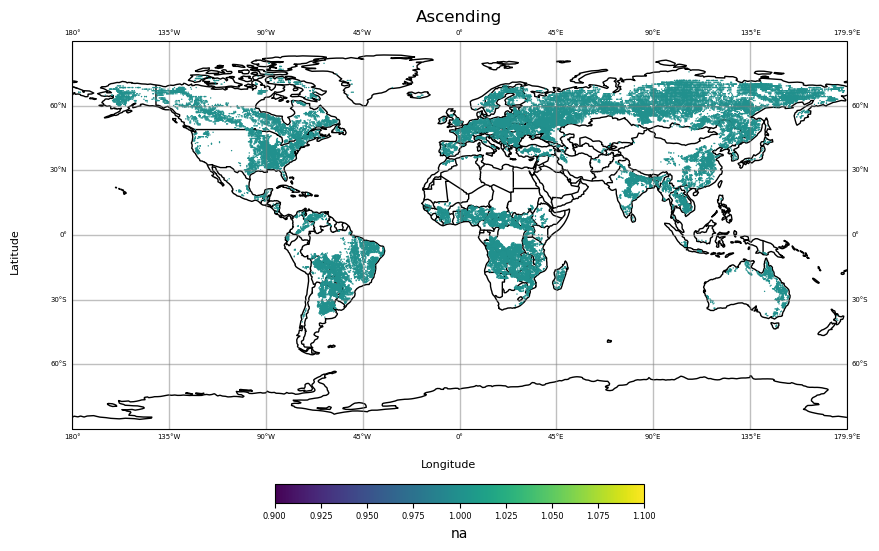

In [44]:
saveflag = False

tmp = obarray[(obarray[ :, 0] == 1),0]
numobs = len(tmp)
tmp = np.empty([numobs, 3])

tmp[:,0] = obarray[(obarray[ :, 0] == 1),0]
tmp[:,1] = obarray[(obarray[ :, 0] == 1),1]
tmp[:,2] = obarray[(obarray[ :, 0] == 1),2]

plot_global(tmp,saveflag,'Ascending') 

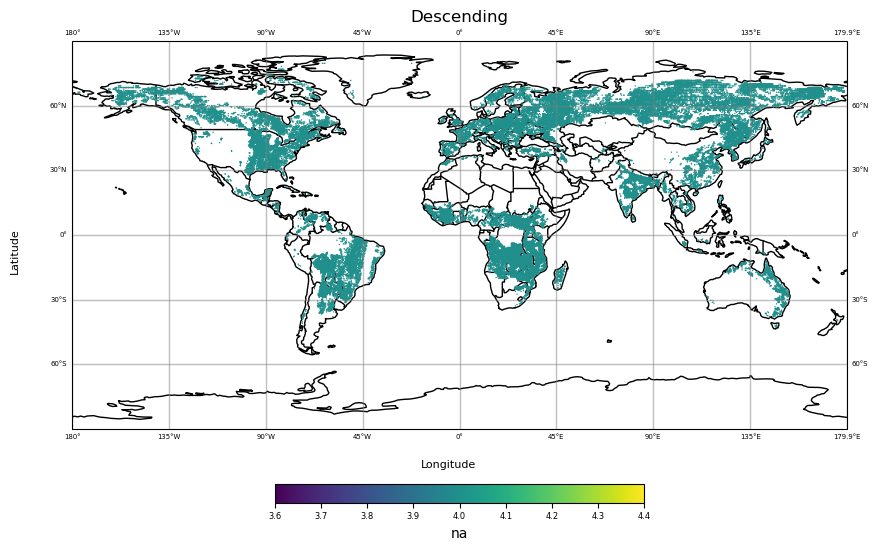

In [45]:
tmp = obarray[(obarray[ :, 0] == 4),0]
numobs = len(tmp)
tmp = np.empty([numobs, 3])

tmp[:,0] = obarray[(obarray[ :, 0] == 4),0]
tmp[:,1] = obarray[(obarray[ :, 0] == 4),1]
tmp[:,2] = obarray[(obarray[ :, 0] == 4),2]

plot_global(tmp,saveflag,'Descending') 

 Saving figure as unique_counts.png 



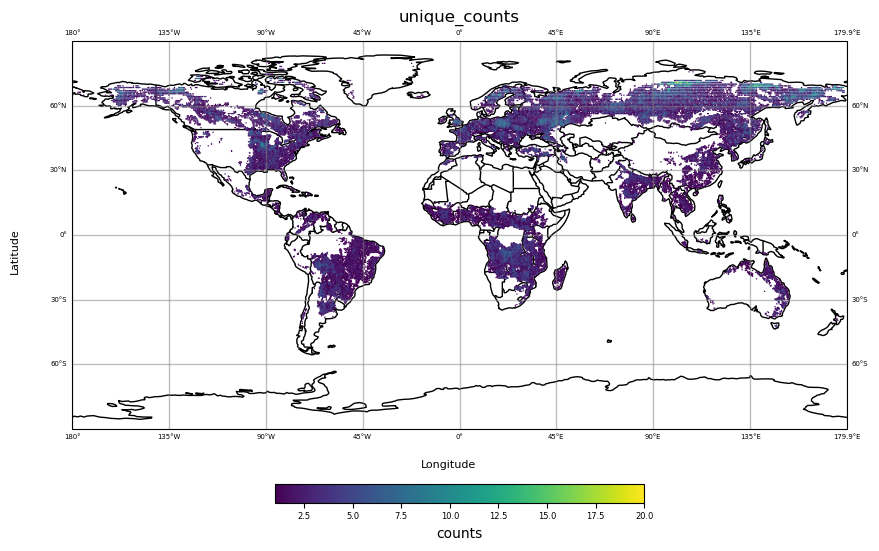

In [62]:
# find the unique rows based on values in the second and third columns
unique_rows, unique_indices, unique_counts = np.unique(obarray[:, 1:], axis=0, return_index=True, return_counts=True)

# count the number of unique rows
num_unique_rows = len(unique_rows)

# print the number of occurrences of each unique row
# for i in range(num_unique_rows):
#     print("Row", unique_rows[i], "occurs", unique_counts[i], "times.")

tmp = np.empty([num_unique_rows, 3])
tmp[:, 1] = obarray[unique_indices, 1]
tmp[:, 2] = obarray[unique_indices, 2]
tmp[:, 0] = unique_counts

plot_global(tmp,True,'unique_counts','counts') 